# "Sklearn NLP: Food Reviews Sentiment Analysis TF-IDF"

- title: "Sklearn: Food Reviews Sentiment Analysis TF-IDF"
- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, tf_idf, sentiment, nlp, classification, python]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('DATA/Amazon_Fine_Food_Reviews.csv')

In [4]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


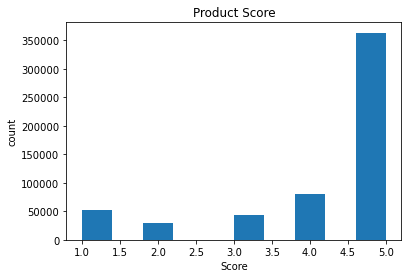

In [5]:
plt.hist(df.Score)
plt.title('Product Score')
plt.xlabel('Score')
plt.ylabel('count')
plt.show()

## Create sentiment feature

In [6]:
df.Score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

In [15]:
# Remove Score = 3
df = df[df.Score != 3]

# Positive = Score > 3, Negative = Score < 3
df['sentiment'] = df.Score.apply(lambda rating: +1 if rating > 3 else -1)

In [16]:
df[['sentiment', 'Score']].head()

,sentiment,Score
0,1,5
1,-1,1
2,1,4
3,-1,2
4,1,5


## Data Cleaning

In [17]:
def remove_punctuation(text):
    cleaned = "".join(char for char in text if char not in ('?', '.',',', 
                                                 ';','...', ':','-','!','"',"'"))
    return cleaned

In [18]:
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(lambda x: x.lower() )
df['Summary'] = df['Summary'].apply(remove_punctuation)
df['Summary'].head()

0    good quality dog food
1        not as advertised
2      delight says it all
3           cough medicine
4              great taffy
Name: Summary, dtype: object

## Define target and features

In [19]:
y = df['sentiment']

X = df['Summary']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420631,), (105158,), (420631,), (105158,))

## Apply TF_IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(X_train)
X_test  = vectorize.transform(X_test)

In [22]:
X_train.shape

(420631, 35437)

In [40]:
print(X_train[0:10])

  (0, 5729)	0.6612300536172102
  (0, 13634)	0.3619725119042043
  (0, 24542)	0.6570774055004038
  (1, 32206)	0.3194426504684755
  (1, 5171)	0.4307416260872357
  (1, 15075)	0.5432356025435939
  (1, 12430)	0.20478609811932436
  (1, 30014)	0.40235326123323667
  (1, 30938)	0.2757540781789939
  (1, 25588)	0.31608599636139606
  (1, 13634)	0.1937445824027499
  (2, 30482)	1.0
  (3, 6393)	0.5033350421919489
  (3, 11821)	0.5729345677312089
  (3, 18237)	0.6468383232309926
  (4, 10179)	0.47146807535171786
  (4, 22237)	0.30628370065028926
  (4, 31020)	0.24474208673816641
  (4, 25469)	0.7651033743506276
  (4, 31364)	0.19653571221648808
  (5, 12355)	0.8395056942912513
  (5, 14007)	0.5433508896215814
  (6, 31696)	0.475943203488847
  (6, 18399)	0.523089592541281
  (6, 15920)	0.34332596334339865
  (6, 15758)	0.5530527509609895
  (6, 3573)	0.2758899831030108
  (7, 30084)	0.5370355138171431
  (7, 34420)	0.6033443187669867
  (7, 30443)	0.5069877008202935
  (7, 31364)	0.3008852956322565
  (8, 9334)	0.8524934

## Create Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

model = RandomForestClassifier(n_estimators=100, verbose=2)


model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 42.5min finished


RandomForestClassifier(verbose=2)

In [24]:
predictions = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.5s finished


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.90      0.80      0.85     16233
           1       0.96      0.98      0.97     88925

    accuracy                           0.96    105158
   macro avg       0.93      0.89      0.91    105158
weighted avg       0.95      0.96      0.95    105158

[[12942  3291]
 [ 1382 87543]]


In [27]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier()


baseline.fit(X_train, y_train)

/Users/samtreacy/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

In [30]:
baseline_predictions = baseline.predict(X_test)

In [31]:

print(classification_report(y_test, baseline_predictions))
print(confusion_matrix(y_test, baseline_predictions))

              precision    recall  f1-score   support

          -1       0.16      0.16      0.16     16233
           1       0.85      0.85      0.85     88925

    accuracy                           0.74    105158
   macro avg       0.50      0.50      0.50    105158
weighted avg       0.74      0.74      0.74    105158

[[ 2595 13638]
 [13646 75279]]
